<a href="https://colab.research.google.com/github/capmar00/tmp/blob/main/Copy_of_03_Notebook_Data_Explo_Guided_tutorial_SALVA_COPIA_IN_LOCALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [TUTORIAL] House Rent Prediction Dataset

- [Checkpoint 0 [Caricamento dati]](#load)
- [Checkpoint 1 [Preparazione dati]](#cleaning)
- [Checkpoint 2 [Data Visualization]](#viz)

Descrizione ufficiale del dataset
<blockquote>

### Content
In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters.

### Dataset Glossary (Column-Wise)
- **BHK**: Number of Bedrooms, Hall, Kitchen.
- **Rent**: Rent of the Houses/Apartments/Flats.
- **Size**: Size of the Houses/Apartments/Flats in Square Feet.
- **Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
- **Area Type**: Size of the Houses/Apartments/Flats calculated on either Super - Area or Carpet Area or Build Area.
- **Area Locality**: Locality of the Houses/Apartments/Flats.
- **City**: City where the Houses/Apartments/Flats are Located.
- **Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
- **Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.
- **Bathroom**: Number of Bathrooms.
- **Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.
</blockquote>


Credits to: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

<a name="load"></a>
### Caricamento dati e prima ispezione

In [ ]:
# carichiamo le librerie che andremo ad utilizzare in questo tutorial
import pandas as pd # la libreria principe per la gestione dei dati in Python
import seaborn as sns # libreria per le visualizzazioni
from pprint import pprint
import numpy as np # libreria per gestire operazioni vettoriali e matriciali, nonchè il concetto di dato missing
import matplotlib.pyplot as plt # altra libreria per le visualizzazioni

Carichiamo in memoria il file csv e scopriamo di quante righe e colonne è composto

In [ ]:
! wget https://raw.githubusercontent.com/i-speranza/datascience-bootcamp-shetech-docebo/main/House_Rent_Dataset.csv

In [ ]:
df = pd.read_csv('House_Rent_Dataset.csv')

print(f"Dimensioni del dataset: {df.shape}")

Dimensioni del dataset: (4746, 12)


Per prima cosa visualizziamo le prime 5 righe del dataset. Chiediamo a Gemini come fare!

> quale è il comando per visualizzare le prime righe di un dataset df con pandas?

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Andiamo a controllare:
1. Quante variabili categoriche (`object`) e quante variabili numeriche (`float64`, `int64`) ci sono. Il comando `.info()` ci restituisce alcune informazioni per ciascuna colonna

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


2. Quanti valori mancanti ci sono per ogni colonna

In [ ]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

3. Controlliamo le statistiche di base per le variabili numeriche. Il comando `.describe()` calcola alcune statistiche di interesse:
* count - numero di valori non nulli
* mean - media
* std - standard deviation
* min - valore minimo
* 25% - 25% percentile
* 50% - 50% percentile
* 75% - 75% percentile
* max - valore massimo

In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Controlliamo quanti valori univoci hanno le varie colonne categoriche
Creiamo un nuovo dataframe "cat", tenendo tutte le righe dell'originale e solo le colonne categoriche.
Il comando `.nunique()` restituisce il numero di valori unici presenti in ciascuna colonna.

Esempi di prompt:
> come seleziono in un dataframe solo le colonne cateogriche?

> come conto il numero di valori unici nelle colonne categoriche di un dataframe?

In [ ]:
cat = df.select_dtypes('object')

In [ ]:
cat.nunique()

Posted On              81
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Point of Contact        3
dtype: int64

Per ogni colonna categorica stampiamo i valori unici e la loro frequenza. Il comando `value_counts()` viene in nostro aiuto!
Notate qualcosa di strano?

In [ ]:
for col in cat.columns:
    print(f"Colonna: {col}\n")
    print(cat[col].value_counts())
    print('\n****************')

Colonna: Posted On

2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: Posted On, Length: 81, dtype: int64

****************
Colonna: Floor

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

****************
Colonna: Area Type

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

****************
Colonna: Area Locality

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
              

<a name="cleaning"></a>
## Preparazione dei dati

Pandas permette di effettuare operazioni sulle colonne di tipo datetime (differenza tra date, calcolo del giorno della settimana, ...).

Al momento però "Posted On" è interpretato come stringa... Facciamoci aiutare da Gemini.

Esempio prompt:
"voglio creare una nuova colonna "Posted_Date" contenenente le date contenute nella colonna "Posted On" in formato datetime. Voglio controllare che il processing sia stato corretto visualizzando le prime righe delle due colonne e poi rimuovere la colonna "Posted On"."

In [ ]:
# creiamo una nuova colonna di tipo DateTime, che pandas saprà gestire come una vera e propria data
df['Posted_Date'] = pd.to_datetime(df['Posted On'])

In [ ]:
df[['Posted_Date', 'Posted On']].head()

,Posted_Date,Posted On
0,2022-05-18,2022-05-18
1,2022-05-13,2022-05-13
2,2022-05-16,2022-05-16
3,2022-07-04,2022-07-04
4,2022-05-09,2022-05-09


In [ ]:
df[['Posted_Date', 'Posted On']].dtypes

Posted_Date    datetime64[ns]
Posted On              object
dtype: object

In [ ]:
# pandas riconosce come date la colonna Posted_Date. Per esempio è possibile calcolare la differenza in giorni tra due date
print(df['Posted_Date'].max() - df['Posted_Date'].min())

89 days 00:00:00


In [ ]:
# cancelliamo la colonna `Posted On`che non ci serve più
df.drop(columns=['Posted On'], inplace=True)  #Se True: la rimozione viene eseguita sul DataFrame corrente. Se False: restituisce una copia in cui viene eseguita la rimozione.

### Colonna "floor"
Da una prima esplorazione sembra che la colonna `floor` sia così composta: "`piano_abitazione` out of `piani_edificio`"
Sia `piano_abitazione` che `piani_edificio` sono valori numerici, ad eccezione di "Ground".

Controlliamo per prima cosa che tutti i valori contengano la stringa "out of", poi analizziamo i valori di `piano_abitazione` e `piani_edificio`.


Chiediamo aiuto a un Large Language Model!


> I have a column named "Floor" which contains indications about floor of an apartmant in this format "APARTMENT_FLOOR out of TOTAL_FLOOR", for example "3 out of 5".
How would you process this column in Python to make it numeric and meaningful in following data anlysis?



In [ ]:
df['Floor'].apply(lambda x: 'out of' not in x).sum() # contiamo le righe che NON contengono la stringa "out of"

4

In [ ]:
# Andiamo a vedere le righe che non contengono la stringa "out of"
df.loc[~df['Floor'].str.contains('out of')]

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Posted_Date
2553,2,20000,400,3,Super Area,"Kasturba Niketan, Lajpat Nagar 2",Delhi,Unfurnished,Bachelors/Family,1,Contact Owner,2022-06-18
2883,1,18000,450,Ground,Carpet Area,"DDA Flat AD Block, Shalimar Bagh AD Block",Delhi,Furnished,Bachelors/Family,1,Contact Owner,2022-05-23
4490,3,15000,900,1,Super Area,"Malakpet, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022-06-12
4560,3,15000,1270,1,Carpet Area,Tarnaka,Hyderabad,Furnished,Family,2,Contact Owner,2022-05-31


In [ ]:
# Sembra che in questi casi non sia noto il numero totale di piani. Andiamo manualmente ad aggiungere la stringa "out of" per uniformarli agli altri
df.loc[~df['Floor'].str.contains('out of'), 'Floor'] = df.loc[~df['Floor'].str.contains('out of'), 'Floor'] + " out of "

In [ ]:
# Andiamo a vedere se i valori sono stati modificati correttamente
df.loc[[2553, 2883, 4490, 4560]]

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Posted_Date
2553,2,20000,400,3 out of,Super Area,"Kasturba Niketan, Lajpat Nagar 2",Delhi,Unfurnished,Bachelors/Family,1,Contact Owner,2022-06-18
2883,1,18000,450,Ground out of,Carpet Area,"DDA Flat AD Block, Shalimar Bagh AD Block",Delhi,Furnished,Bachelors/Family,1,Contact Owner,2022-05-23
4490,3,15000,900,1 out of,Super Area,"Malakpet, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022-06-12
4560,3,15000,1270,1 out of,Carpet Area,Tarnaka,Hyderabad,Furnished,Family,2,Contact Owner,2022-05-31


In [ ]:
# Ora possiamo creare due nuove colonne 'Floor_Number' and 'Total_Floors'
df['Floor_Number'] = df.Floor.apply(lambda x: x.split('out of')[0].strip()) #split() restituisce una lista di stringhe
df['Total_Floors'] = df.Floor.apply(lambda x: x.split('out of')[1].strip()) #strip() rimuove eventuali spazi a inzio e fine stringa

# Controlliamo di aver fatto tutto giusto!
df[['Floor','Floor_Number','Total_Floors']]

,Floor,Floor_Number,Total_Floors
0,Ground out of 2,Ground,2
1,1 out of 3,1,3
2,1 out of 3,1,3
3,1 out of 2,1,2
4,1 out of 2,1,2
...,...,...,...
4741,3 out of 5,3,5
4742,1 out of 4,1,4
4743,3 out of 5,3,5
4744,23 out of 34,23,34


In [ ]:
# Controlliamo i valori unici delle due nuove variabili
df.Floor_Number.value_counts()

1                 1161
2                  945
Ground             927
3                  512
4                  272
5                  164
6                   93
7                   74
10                  67
8                   66
9                   65
12                  47
11                  43
15                  41
14                  34
18                  26
Upper Basement      23
17                  22
16                  21
19                  16
13                  15
20                  12
25                  12
Lower Basement      11
23                   9
24                   6
21                   6
30                   5
34                   4
28                   4
35                   3
65                   3
22                   3
26                   3
32                   3
60                   3
27                   3
40                   2
53                   2
45                   2
36                   2
48                   2
29                   1
49         

In [ ]:
# Sostituiamo "Ground" con 0 e "Upper Basement" (seminterrato),"Lower Basement" (interrato) con -1, così trattiamo solo valori numerici
df.replace({"Ground": 0, "Upper Basement": -1, "Lower Basement": -1}, inplace=True)
df.Floor_Number.value_counts()

1     1161
2      945
0      927
3      512
4      272
5      164
6       93
7       74
10      67
8       66
9       65
12      47
11      43
15      41
-1      34
14      34
18      26
17      22
16      21
19      16
13      15
20      12
25      12
23       9
24       6
21       6
30       5
34       4
28       4
27       3
26       3
32       3
60       3
65       3
35       3
22       3
48       2
53       2
45       2
36       2
40       2
29       1
50       1
49       1
39       1
46       1
41       1
44       1
33       1
37       1
47       1
43       1
76       1
Name: Floor_Number, dtype: int64

In [ ]:
df.Floor_Number.unique() # come desiderato ora tutti i valori sono numerici. Convertiamo il tipo della colonna a integer (ora sono interprpetati come stringhe)

array([0, '1', '2', '4', '3', '5', '7', '8', -1, '11', '6', '14', '43',
       '13', '18', '17', '9', '19', '60', '34', '12', '26', '25', '53',
       '16', '10', '39', '32', '47', '28', '20', '15', '65', '40', '37',
       '22', '21', '30', '35', '33', '44', '41', '46', '27', '45', '48',
       '50', '24', '23', '29', '49', '36', '76'], dtype=object)

In [ ]:
df['Floor_Number'] = df['Floor_Number'].astype(int)
df.Floor_Number.sort_values().unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33,
       34, 35, 36, 37, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 53, 60,
       65, 76])

In [ ]:
df.Total_Floors.value_counts()

4     938
3     914
2     868
5     422
1     333
     ... 
62      1
54      1
39      1
59      1
89      1
Name: Total_Floors, Length: 67, dtype: int64

In [ ]:
df.Total_Floors.unique() # la stringa vuota è in corrispondenza di quelle righe in cui mancava il numero totale di piani

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34', ''],
      dtype=object)

In [ ]:
df['Total_Floors'] = df['Total_Floors'].replace({'': np.nan}).astype(float) # qui dobbiamo utilizzare il tipo float, perchè il tipo integer non riconosce il dato missing
df.Total_Floors.sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 48., 50., 51., 52., 54., 55.,
       58., 59., 60., 62., 66., 68., 71., 75., 76., 77., 78., 81., 85.,
       89., nan])

In [ ]:
# Laddove manca il valore "Total_Floors" andiamo ad inserire il "Floor_Number" + 2 per evitare di avere il dato mancante. Mettiamo +2 per evitare di avere 0 o -1
df['Total_Floors'].fillna(df['Floor_Number'] + 2, inplace=True)

# Verifichiamo che i valori siano stati correttamente imputati
df.loc[[2553, 2883, 4490, 4560]]

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Posted_Date,Floor_Number,Total_Floors
2553,2,20000,400,3 out of,Super Area,"Kasturba Niketan, Lajpat Nagar 2",Delhi,Unfurnished,Bachelors/Family,1,Contact Owner,2022-06-18,3,5.0
2883,1,18000,450,Ground out of,Carpet Area,"DDA Flat AD Block, Shalimar Bagh AD Block",Delhi,Furnished,Bachelors/Family,1,Contact Owner,2022-05-23,0,2.0
4490,3,15000,900,1 out of,Super Area,"Malakpet, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022-06-12,1,3.0
4560,3,15000,1270,1 out of,Carpet Area,Tarnaka,Hyderabad,Furnished,Family,2,Contact Owner,2022-05-31,1,3.0


In [ ]:
# controlliamo che non ci siano più valori mancanti
df.Total_Floors.sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 48., 50., 51., 52., 54., 55.,
       58., 59., 60., 62., 66., 68., 71., 75., 76., 77., 78., 81., 85.,
       89.])

In [ ]:
# trasformiano in int il tipo della colonna
df['Total_Floors'] = df['Total_Floors'].astype(int)

Ora possiamo rimuovere l'originale colonna `Floor` che è stata sostituita dalle colonne `Floor_Number` e `Total_Floors`.



In [ ]:
df.drop(columns=['Floor'], inplace=True)

### Colonna "Area Type"

Riguardiamo i value_counts di `Area Type` e `Point of Contact`... Ci sono dei valori che appaiono molto raramente? Possiamo accorparli ad un'altra categoria?

In [ ]:
df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

Approfondendo il significato dei 3 valori [qui](https://housing.com/news/real-estate-basics-part-1-carpet-area-built-up-area-super-built-up-area/), scopriamo che Built Area è circa simile a Carpet Area, quindi possiamo accorparlo a quella categoria.


In [ ]:
df.replace({'Area Type': {'Built Area': 'Carpet Area'}}, inplace=True)
df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2300
Name: Area Type, dtype: int64

### Colonna "Point of Contact"

In [ ]:
df.groupby(['Point of Contact'])['Rent'].agg([min, max])  # Il metodo agg() consente di applicare una funzione o una lista di funzioni da eseguire lungo uno degli assi del DataFrame (default 0, che è l'asse dell'indice riga)

,min,max
Point of Contact,,
Contact Agent,5000,3500000
Contact Builder,5500,5500
Contact Owner,1200,600000


In [ ]:
df['Point of Contact'].value_counts() # in questo caso i 3 valori rappresentano entità effettivamente ben distinte. Non possiamo accorpare Builder a nessuna delle altre categorie...

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

<a name="viz"></a>
## Data Visualization

Aiutiamoci con alcuni grafici per verificare se emergono relazioni interessanti tra le varie caratteristiche di ciascuna abitazione in affitto e il suo prezzo.

In [ ]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Posted_Date', 'Floor_Number', 'Total_Floors'],
      dtype='object')

Nel corso del tempo c'è stato un trend nei prezzi di affitto?

<Axes: xlabel='Posted_Date', ylabel='Rent'>

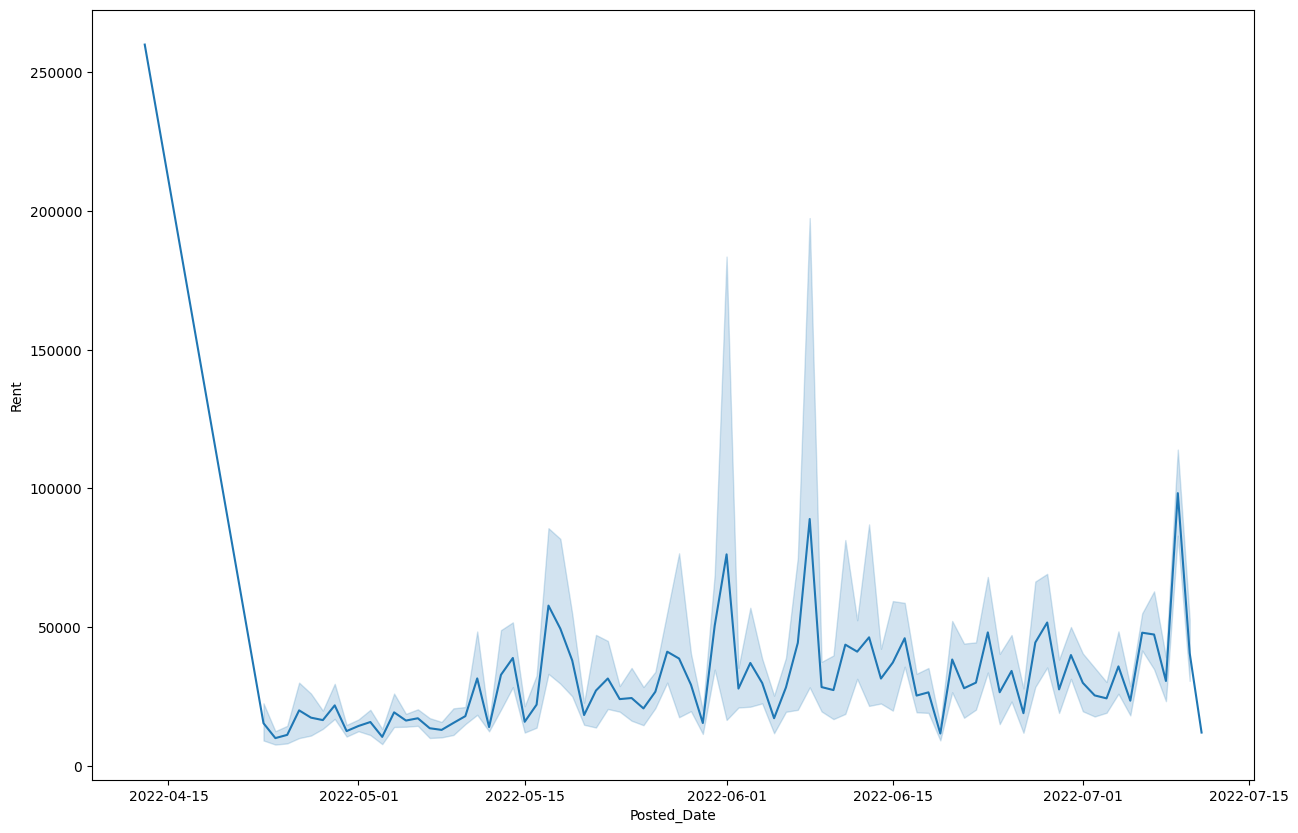

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))   #plt.subplots() è una funzione che restituisce una tupla contenente una figura e uno o più oggetti assi. fig, ax = plt.subplots() decomprime questa tupla nelle variabili fig e ax.
sns.lineplot(data=df, x='Posted_Date', y='Rent', ax=ax)   # ax=ax specifica che il grafico verrà disegnato nell'area degli assi ax creati in precedenza

a parte un valore molto alto a inizio periodo, non sembra apparire un trend particolare. Proviamo a segmentare per numero di locali (`BHK`) e per città (`City`)

<Axes: xlabel='Posted_Date', ylabel='Rent'>

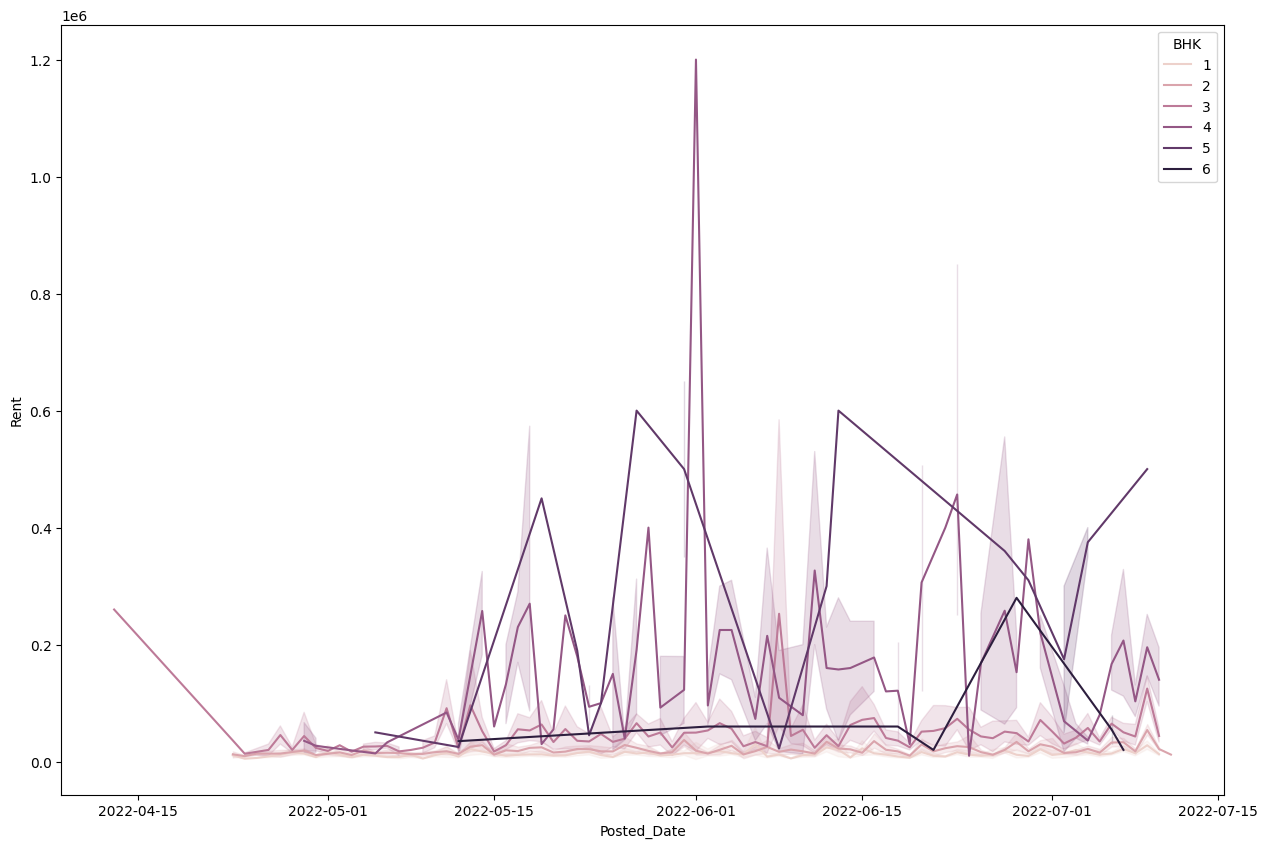

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=df, x='Posted_Date', y='Rent', hue='BHK', ax=ax) # non sembra esserci un trend in nessuna delle categorie

<Axes: xlabel='Posted_Date', ylabel='Rent'>

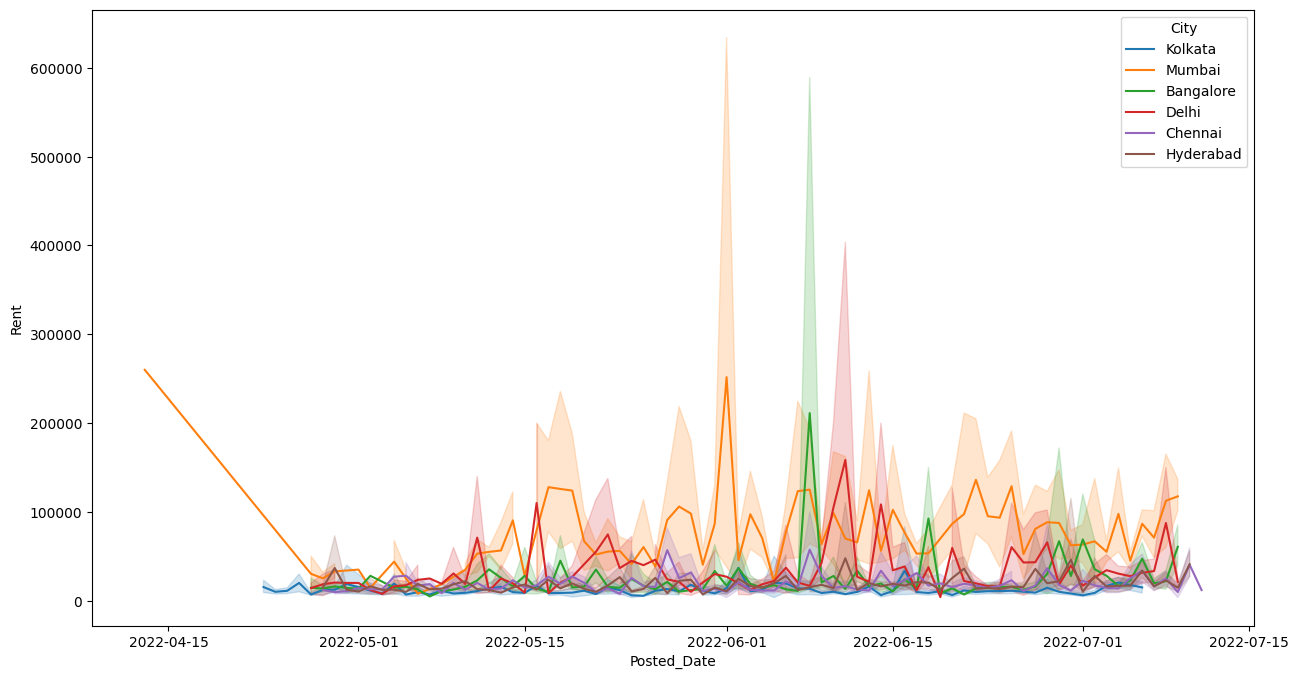

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=df, x='Posted_Date', y='Rent', hue='City', ax=ax)
# anche suddividendo per città non emerge un trend temporale particolare, anche perchè il range che stiamo analizzando è piuttosto breve.

Dipendenza tra prezzo e numero di locali, rappresentata tramite [boxplot](https://www.geeksforgeeks.org/box-plot/) - [fig](https://media.geeksforgeeks.org/wp-content/uploads/20201127012952/boxplot.png)

<Axes: xlabel='BHK', ylabel='Rent'>

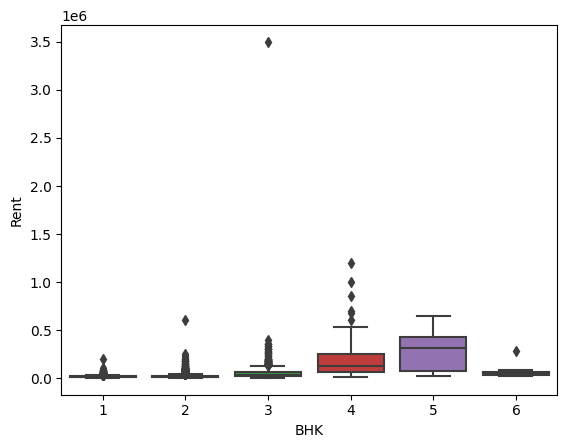

In [ ]:
sns.boxplot(data=df, x='BHK', y='Rent')

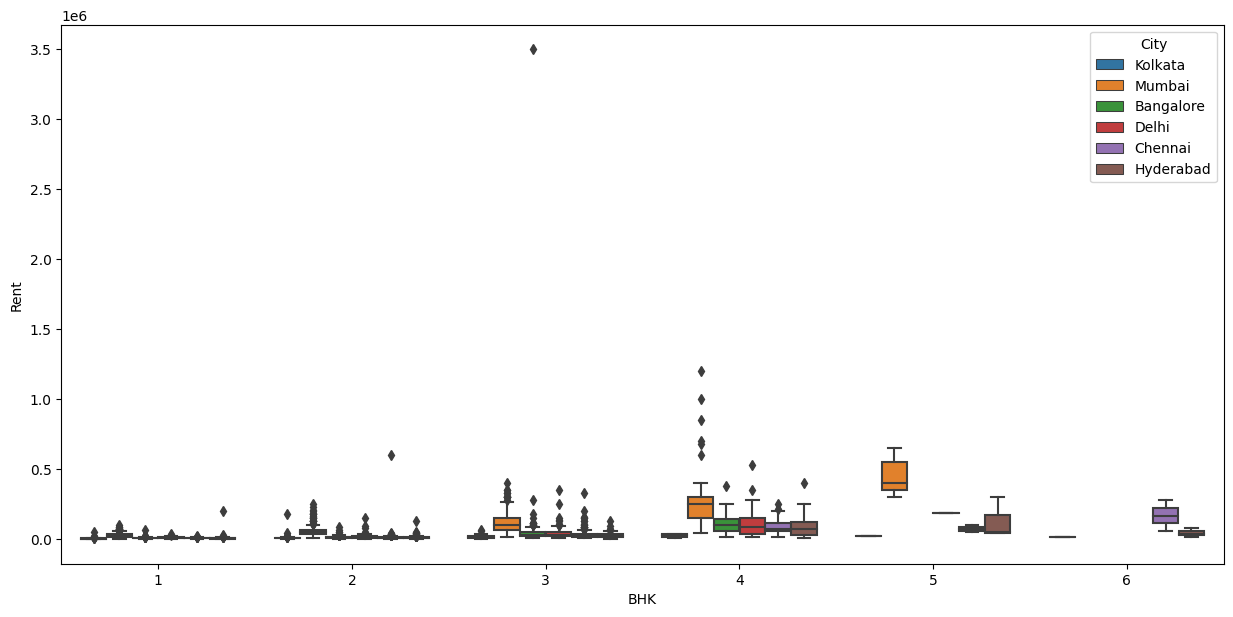

In [ ]:
fig, ax = plt.subplots(figsize=(15,7));
sns.boxplot(data=df, x='BHK', y='Rent', hue='City', ax=ax);

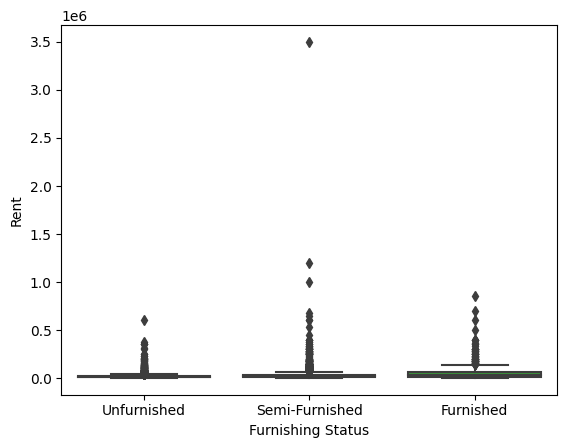

In [ ]:
# vediamo se c'è qualche differenza in base al Furnishing Status
sns.boxplot(data=df, x='Furnishing Status', y='Rent');

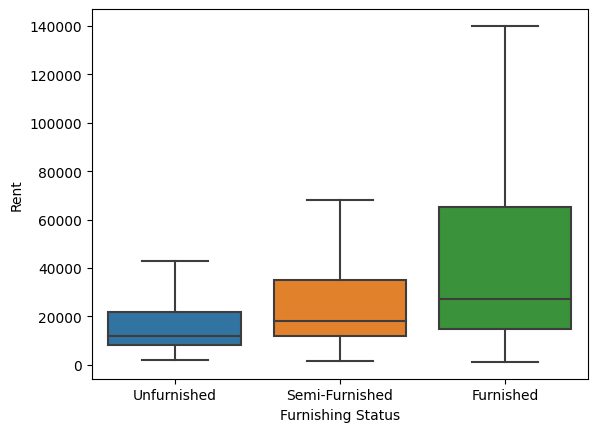

In [ ]:
# c'è un outlier che schiaccia tutto il grafico! Creiamo un plot senza outliers
sns.boxplot(data=df, x='Furnishing Status', y='Rent', showfliers = False);